<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Poisson (Point) Process**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Poisson point process is a type of random mathematical object that consists of points randomly located on a mathematical space

* Its name derives from the fact that if a collection of random points in some space forms a Poisson process, then the number of points in a region of finite size is a random variable with a Poisson distribution. 

* The process was discovered independently and repeatedly in several settings, including experiments on radioactive decay, telephone call arrivals and insurance mathematics. The Poisson point process is often defined on the real line, where it can be considered as a stochastic process. 

* In this setting, it is used, for example, in queueing theory to model random events, such as the arrival of customers at a store, phone calls at an exchange or occurrence of earthquakes, distributed in time. In the plane, the point process, also known as a spatial Poisson process, can represent the locations of scattered objects such as transmitters in a wireless network, particles colliding into a detector, or trees in a forest.

* In all settings, the Poisson point process has the property that each point is stochastically independent to all the other points in the process, which is why it is sometimes called a purely or completely random process.

* Despite its wide use as a stochastic model of phenomena representable as points, the inherent nature of the process implies that it does not adequately describe phenomena where there is sufficiently strong interaction between the points. This has inspired the proposal of other point processes, some of which are constructed with the Poisson point process, that seek to capture such interaction.

**Examples**

Poisson processes can be seen in all walks of life. Here are some examples:

* At a drive-through pharmacy, the number of cars driving up to the drop off window in some interval of time.
* The number of hot dogs sold by Papaya King from 12pm to 4pm on Sundays.
* Failures of ultrasound machines in a hospital.
* The number of vehicles passing through some intersection from 8am to 11am on weekdays.
* Number of electrical pulses generated by a photo-detector that is exposed to a beam of photons, in 1 minute.

**Homogeneous vs nonhomogeneous Poisson point process**

* The point process depends on a single mathematical object, which, depending on the context, may be a constant, a locally integrable function or, in more general settings, a [Radon measure](https://en.m.wikipedia.org/wiki/Radon_measure). 

* In the first case, the constant, known as the rate or intensity, is the average density of the points in the Poisson process located in some region of space. The resulting point process is called a homogeneous or stationary Poisson point process.

* In the second case, the point process is called an inhomogeneous or nonhomogeneous Poisson point process, and the average density of points depend on the location of the underlying space of the Poisson point process. 

* The word point is often omitted, but there are other Poisson processes of objects, which, instead of points, consist of more complicated mathematical objects such as lines and polygons, and such processes can be based on the Poisson point process.

**Relationship to other processes**

* On the real line, the Poisson process is a type of **continuous-time Markov process** known as a birth-death process (with just births and zero deaths) and is called a pure or simple birth process.

* More complicated processes with the Markov property, such as Markov arrival processes, have been defined where the Poisson process is a special case

**Properties**

* It is made up of a sequence of random variables X1, X2, X3, …Xk such that each variable represents the number of occurrences of some event, such as patients walking into an ER, during some interval of time.

* It is a stochastic process. Each time you run the Poisson process, it will produce a different sequence of random outcomes as per some probability distribution which we will soon see.

* It is a discrete process. The Poisson process’s outcomes are the number of occurrences of some event in the specified period of time, which is undoubtedly an integer —i.e. a discrete number.

* It has independent increments. What this is means is that the number of events that the process predicts will occur in any given interval, is independent of the number in any other disjoint interval. For e.g. the number of people walking into the ER from time zero (start of the observation) up through 10am, is independent of the number walking in from 3:33pm to 8:26pm, or from 11:00pm to 11:05pm and so on.

* The Poisson process’s constituent variables X1, X2, X3,…Xk all have identical distribution.

* The Poisson process’s constituent variables X1, X2, X3,…Xk all have a Poisson distribution, which is given by the Probability Mass Function:

> $P_{X}(k)=\frac{e^{-\lambda} * \lambda^{k}}{k !}$

** Modeling inter-arrival times**

The Poisson process has a remarkable substructure. Even though the number of occurrence of events is modeled using a discrete Poisson distribution, the interval of time between consecutive events can be modeled using the Exponential distribution,which is a continuous distribution.

https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a

EVENT_NUM,INTER_EVENT_T,EVENT_T
0,0.10150270056031621,0.10150270056031621
1,0.42452001116902405,0.5260227117293402
2,0.13996018532449359,0.6659828970538338
3,0.13934066042200863,0.8053235574758425
4,1.0281588901992251,1.8334824476750677
5,0.3656752130696071,2.199157660744675
6,0.37403305690219324,2.5731907176468685
7,0.007754653021082217,2.580945370667951
8,0.11157366654747107,2.6925190372154217
9,0.6158460329113915,3.308365070126813
10,0.2818623215750301,3.590227391701843
11,0.009533219749721027,3.599760611451564
12,0.010406123334336142,3.6101667347859
13,0.17302973005534117,3.7831964648412413
14,0.24941239809822427,4.032608862939465
15,0.010998629842780761,4.043607492782246
16,0.030023782941192352,4.0736312757234385
17,0.2838524178682007,4.3574836935916395
18,0.165580548420293,4.523064242011932
19,0.0047352303191412915,4.527799472331074
20,0.05761603589650603,4.585415508227579
21,0.5010600896516919,5.0864755978792715
22,0.07822983431906304,5.164705432198335
23,0.0714624593316753,5.23

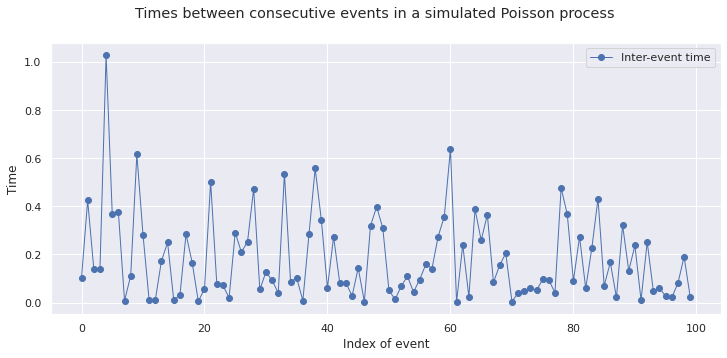

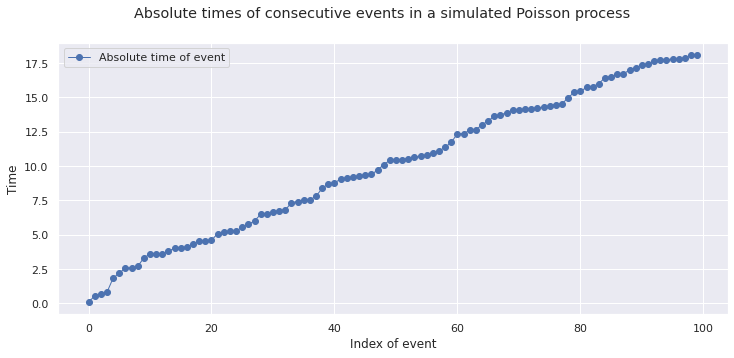

INTERVAL_NUM,NUM_EVENTS
1,4
2,1
3,4
4,5
5,7
6,6
7,6
8,5
9,3
10,7
11,9
12,3
13,4
14,5
15,10
16,4
17,5
18,10
5.444444444444445


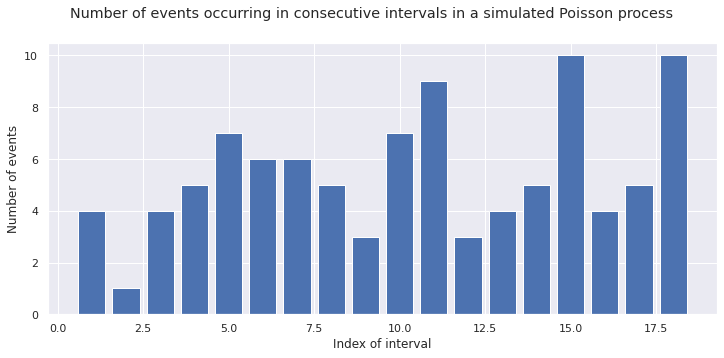

In [7]:
import random
import math
import statistics

sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.0})

_lambda = 5
_num_events = 100
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#Get a random probability value from the uniform distribution's PDF
	n = random.random()

	#Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print(str(i) +',' + str(_inter_event_time) + ',' + str(_event_time))

#plot the inter-event times
fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


#plot the absolute event times
fig = plt.figure()
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#print the mean number of events per unit time
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Number of events occurring in consecutive intervals in a simulated Poisson process')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('Index of interval')
plt.ylabel('Number of events')
plt.show()